___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Flavio Maximiliano Herrada Avalos</Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `flavio.herrada@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam


In [3]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [4]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


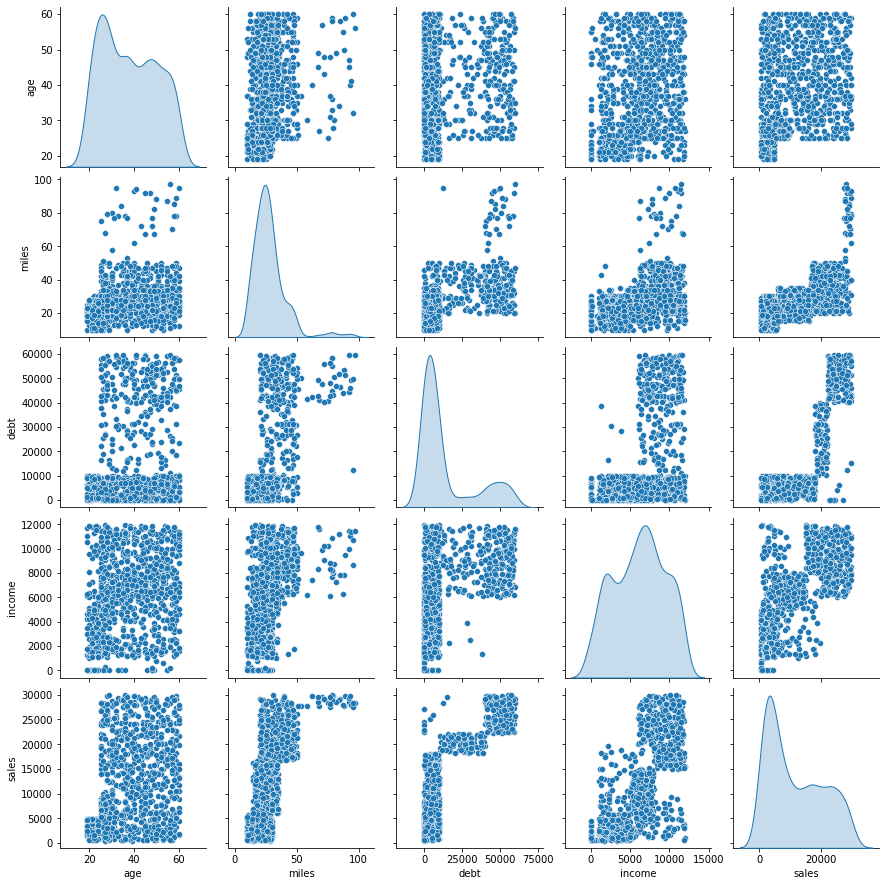

In [5]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [6]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [7]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [9]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)
#Métricas de performance
mae_lr = metrics.mean_absolute_error(y_test,y_pred)
mse_lr = metrics.mean_squared_error(y_test,y_pred)
r2_lr = metrics.r2_score(y_test,y_pred)


# Imprimir resultados
print('R2: ',r2_lr)
print('Mae: ',mae_lr)
print('Mse: ',mse_lr)
print('Rmse: ',np.sqrt(mse_lr))

R2:  0.8364108886819762
Mae:  0.3119007815345351
Mse:  0.16358911131802378
Rmse:  0.404461507832357


#### Regresión Lineal con selección de variables

In [10]:
rfe = RFE(lin_reg)
rfe = rfe.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = rfe.predict (X_test)
#Métricas de performance
mae_rfe = metrics.mean_absolute_error(y_test, y_pred)
mse_rfe = metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)
# Imprimir resultados
print('R2: ',r2_lr)
print('Mae: ',mae_lr)
print('Mse: ',mse_lr)
print('Rmse: ',np.sqrt(mse_lr))

R2:  0.8364108886819762
Mae:  0.3119007815345351
Mse:  0.16358911131802378
Rmse:  0.404461507832357


#### Regresión Lineal con regularización Ridge


In [11]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254731
MAE:  0.3119341315613786
MSE:  0.16358274687452687
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [12]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084579202821852
MAE:  0.21442115274283988
MSE:  0.09154207971781475


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [13]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978243
MAE:  0.23686136868452895
MSE:  0.10600314680217567


#### Red Neuronal

In [14]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 1s 113ms/step - loss: 0.6027 - mae: 0.6226 - mse: 0.6027 - val_loss: 0.2024 - val_mae: 0.3477 - val_mse: 0.2024
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1958 - mae: 0.3394 - mse: 0.1958 - val_loss: 0.1772 - val_mae: 0.3243 - val_mse: 0.1772
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1766 - mae: 0.3157 - mse: 0.1766 - val_loss: 0.1496 - val_mae: 0.2881 - val_mse: 0.1496
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1605 - mae: 0.2956 - mse: 0.1605 - val_loss: 0.1626 - val_mae: 0.3296 - val_mse: 0.1626
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1639 - mae: 0.3062 - mse: 0.1639 - val_loss: 0.1303 - val_mae: 0.2667 - val_mse: 0.1303
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1523 - mae: 0.2851 - mse: 0.1523 - val_loss: 0.1245 - val_mae: 0.2734 - val_mse: 0.1245
Epoch 7/1000
4/4 [===

4/4 [==============================] - 0s 15ms/step - loss: 0.1291 - mae: 0.2601 - mse: 0.1291 - val_loss: 0.1382 - val_mae: 0.3030 - val_mse: 0.1382
Epoch 52/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1382 - mae: 0.2753 - mse: 0.1382 - val_loss: 0.1095 - val_mae: 0.2420 - val_mse: 0.1095
Epoch 53/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1303 - mae: 0.2629 - mse: 0.1303 - val_loss: 0.1085 - val_mae: 0.2445 - val_mse: 0.1085
Epoch 54/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1270 - mae: 0.2578 - mse: 0.1270 - val_loss: 0.1117 - val_mae: 0.2447 - val_mse: 0.1117
Epoch 55/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1391 - mae: 0.2772 - mse: 0.1391 - val_loss: 0.1166 - val_mae: 0.2664 - val_mse: 0.1166
Epoch 56/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1308 - mae: 0.2680 - mse: 0.1308 - val_loss: 0.1143 - val_mae: 0.2553 - val_mse: 0.1143
Epoch 57/1000
4/4 [===========

4/4 [==============================] - 0s 11ms/step - loss: 0.1282 - mae: 0.2627 - mse: 0.1282 - val_loss: 0.1087 - val_mae: 0.2554 - val_mse: 0.1087
Epoch 102/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1240 - mae: 0.2572 - mse: 0.1240 - val_loss: 0.1067 - val_mae: 0.2432 - val_mse: 0.1067
Epoch 103/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1249 - mae: 0.2587 - mse: 0.1249 - val_loss: 0.1131 - val_mae: 0.2632 - val_mse: 0.1131
Epoch 104/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1285 - mae: 0.2641 - mse: 0.1285 - val_loss: 0.1071 - val_mae: 0.2417 - val_mse: 0.1071
Epoch 105/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1274 - mae: 0.2586 - mse: 0.1274 - val_loss: 0.1103 - val_mae: 0.2447 - val_mse: 0.1103
Epoch 106/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1242 - mae: 0.2539 - mse: 0.1242 - val_loss: 0.1128 - val_mae: 0.2468 - val_mse: 0.1128
Epoch 107/1000
4/4 [=====

Epoch 151/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1238 - mae: 0.2585 - mse: 0.1238 - val_loss: 0.1119 - val_mae: 0.2551 - val_mse: 0.1119
Epoch 152/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1221 - mae: 0.2556 - mse: 0.1221 - val_loss: 0.1103 - val_mae: 0.2506 - val_mse: 0.1103
Epoch 153/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1209 - mae: 0.2531 - mse: 0.1209 - val_loss: 0.1071 - val_mae: 0.2427 - val_mse: 0.1071
Epoch 154/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1209 - mae: 0.2504 - mse: 0.1209 - val_loss: 0.1054 - val_mae: 0.2438 - val_mse: 0.1054
Epoch 155/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1220 - mae: 0.2515 - mse: 0.1220 - val_loss: 0.1168 - val_mae: 0.2535 - val_mse: 0.1168
Epoch 156/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1213 - mae: 0.2525 - mse: 0.1213 - val_loss: 0.1071 - val_mae: 0.2507 - val_mse: 0.1071
Epoch 157/

Epoch 201/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1212 - mae: 0.2582 - mse: 0.1212 - val_loss: 0.1064 - val_mae: 0.2491 - val_mse: 0.1064
Epoch 202/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1164 - mae: 0.2512 - mse: 0.1164 - val_loss: 0.1142 - val_mae: 0.2584 - val_mse: 0.1142
Epoch 203/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1198 - mae: 0.2542 - mse: 0.1198 - val_loss: 0.1066 - val_mae: 0.2479 - val_mse: 0.1066
Epoch 204/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1167 - mae: 0.2521 - mse: 0.1167 - val_loss: 0.1179 - val_mae: 0.2562 - val_mse: 0.1179
Epoch 205/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1200 - mae: 0.2566 - mse: 0.1200 - val_loss: 0.1603 - val_mae: 0.2998 - val_mse: 0.1603
Epoch 206/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1257 - mae: 0.2615 - mse: 0.1257 - val_loss: 0.1147 - val_mae: 0.2642 - val_mse: 0.1147
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1239 - mae: 0.2587 - mse: 0.1239 - val_loss: 0.1094 - val_mae: 0.2460 - val_mse: 0.1094
Epoch 252/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1144 - mae: 0.2450 - mse: 0.1144 - val_loss: 0.1135 - val_mae: 0.2655 - val_mse: 0.1135
Epoch 253/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1179 - mae: 0.2588 - mse: 0.1179 - val_loss: 0.1288 - val_mae: 0.2680 - val_mse: 0.1288
Epoch 254/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1179 - mae: 0.2494 - mse: 0.1179 - val_loss: 0.1095 - val_mae: 0.2463 - val_mse: 0.1095
Epoch 255/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1148 - mae: 0.2488 - mse: 0.1148 - val_loss: 0.1184 - val_mae: 0.2571 - val_mse: 0.1184
Epoch 256/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1137 - mae: 0.2462 - mse: 0.1137 - val_loss: 0.1067 - val_mae: 0.2486 - val_mse: 0.1067
Epoch 257/

Epoch 301/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1138 - mae: 0.2441 - mse: 0.1138 - val_loss: 0.1208 - val_mae: 0.2784 - val_mse: 0.1208
Epoch 302/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1190 - mae: 0.2616 - mse: 0.1190 - val_loss: 0.1232 - val_mae: 0.2602 - val_mse: 0.1232
Epoch 303/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1162 - mae: 0.2491 - mse: 0.1162 - val_loss: 0.1104 - val_mae: 0.2466 - val_mse: 0.1104
Epoch 304/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1138 - mae: 0.2452 - mse: 0.1138 - val_loss: 0.1113 - val_mae: 0.2598 - val_mse: 0.1113
Epoch 305/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1185 - mae: 0.2560 - mse: 0.1185 - val_loss: 0.1066 - val_mae: 0.2444 - val_mse: 0.1066
Epoch 306/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1141 - mae: 0.2451 - mse: 0.1141 - val_loss: 0.1360 - val_mae: 0.2776 - val_mse: 0.1360
Epoch 307/

Epoch 351/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1112 - mae: 0.2477 - mse: 0.1112 - val_loss: 0.1047 - val_mae: 0.2412 - val_mse: 0.1047
Epoch 352/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1101 - mae: 0.2450 - mse: 0.1101 - val_loss: 0.1092 - val_mae: 0.2442 - val_mse: 0.1092
Epoch 353/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1126 - mae: 0.2441 - mse: 0.1126 - val_loss: 0.1079 - val_mae: 0.2430 - val_mse: 0.1079
Epoch 354/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1109 - mae: 0.2409 - mse: 0.1109 - val_loss: 0.1138 - val_mae: 0.2641 - val_mse: 0.1138
Epoch 355/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1142 - mae: 0.2506 - mse: 0.1142 - val_loss: 0.1062 - val_mae: 0.2445 - val_mse: 0.1062
Epoch 356/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1108 - mae: 0.2449 - mse: 0.1108 - val_loss: 0.1117 - val_mae: 0.2466 - val_mse: 0.1117
Epoch 357/

Epoch 401/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1127 - mae: 0.2495 - mse: 0.1127 - val_loss: 0.1145 - val_mae: 0.2490 - val_mse: 0.1145
Epoch 402/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1132 - mae: 0.2463 - mse: 0.1132 - val_loss: 0.1186 - val_mae: 0.2554 - val_mse: 0.1186
Epoch 403/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1120 - mae: 0.2456 - mse: 0.1120 - val_loss: 0.1097 - val_mae: 0.2434 - val_mse: 0.1097
Epoch 404/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1078 - mae: 0.2393 - mse: 0.1078 - val_loss: 0.1149 - val_mae: 0.2634 - val_mse: 0.1149
Epoch 405/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1321 - mae: 0.2728 - mse: 0.1321 - val_loss: 0.1063 - val_mae: 0.2470 - val_mse: 0.1063
Epoch 406/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1082 - mae: 0.2431 - mse: 0.1082 - val_loss: 0.1186 - val_mae: 0.2546 - val_mse: 0.1186
Epoch 407/

Epoch 451/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1061 - mae: 0.2386 - mse: 0.1061 - val_loss: 0.1173 - val_mae: 0.2543 - val_mse: 0.1173
Epoch 452/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1093 - mae: 0.2425 - mse: 0.1093 - val_loss: 0.1147 - val_mae: 0.2481 - val_mse: 0.1147
Epoch 453/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1103 - mae: 0.2417 - mse: 0.1103 - val_loss: 0.1193 - val_mae: 0.2626 - val_mse: 0.1193
Epoch 454/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1108 - mae: 0.2448 - mse: 0.1108 - val_loss: 0.1097 - val_mae: 0.2510 - val_mse: 0.1097
Epoch 455/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1135 - mae: 0.2490 - mse: 0.1135 - val_loss: 0.1098 - val_mae: 0.2568 - val_mse: 0.1098
Epoch 456/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1104 - mae: 0.2454 - mse: 0.1104 - val_loss: 0.1084 - val_mae: 0.2470 - val_mse: 0.1084
Epoch 457/

Epoch 501/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1063 - mae: 0.2381 - mse: 0.1063 - val_loss: 0.1145 - val_mae: 0.2520 - val_mse: 0.1145
Epoch 502/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1065 - mae: 0.2398 - mse: 0.1065 - val_loss: 0.1182 - val_mae: 0.2504 - val_mse: 0.1182
Epoch 503/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1078 - mae: 0.2420 - mse: 0.1078 - val_loss: 0.1248 - val_mae: 0.2587 - val_mse: 0.1248
Epoch 504/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1096 - mae: 0.2424 - mse: 0.1096 - val_loss: 0.1085 - val_mae: 0.2487 - val_mse: 0.1085
Epoch 505/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1068 - mae: 0.2437 - mse: 0.1068 - val_loss: 0.1317 - val_mae: 0.2692 - val_mse: 0.1317
Epoch 506/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1084 - mae: 0.2415 - mse: 0.1084 - val_loss: 0.1084 - val_mae: 0.2425 - val_mse: 0.1084
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1069 - mae: 0.2423 - mse: 0.1069 - val_loss: 0.1102 - val_mae: 0.2422 - val_mse: 0.1102
Epoch 552/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1077 - mae: 0.2404 - mse: 0.1077 - val_loss: 0.1081 - val_mae: 0.2424 - val_mse: 0.1081
Epoch 553/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1048 - mae: 0.2369 - mse: 0.1048 - val_loss: 0.1177 - val_mae: 0.2509 - val_mse: 0.1177
Epoch 554/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1075 - mae: 0.2377 - mse: 0.1075 - val_loss: 0.1168 - val_mae: 0.2500 - val_mse: 0.1168
Epoch 555/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1086 - mae: 0.2414 - mse: 0.1086 - val_loss: 0.1123 - val_mae: 0.2472 - val_mse: 0.1123
Epoch 556/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1080 - mae: 0.2451 - mse: 0.1080 - val_loss: 0.1186 - val_mae: 0.2530 - val_mse: 0.1186
Epoch 557/

Epoch 601/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1070 - mae: 0.2408 - mse: 0.1070 - val_loss: 0.1095 - val_mae: 0.2481 - val_mse: 0.1095
Epoch 602/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1071 - mae: 0.2408 - mse: 0.1071 - val_loss: 0.1124 - val_mae: 0.2450 - val_mse: 0.1124
Epoch 603/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1102 - mae: 0.2408 - mse: 0.1102 - val_loss: 0.1094 - val_mae: 0.2461 - val_mse: 0.1094
Epoch 604/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1049 - mae: 0.2391 - mse: 0.1049 - val_loss: 0.1110 - val_mae: 0.2433 - val_mse: 0.1110
Epoch 605/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1075 - mae: 0.2398 - mse: 0.1075 - val_loss: 0.1080 - val_mae: 0.2423 - val_mse: 0.1080
Epoch 606/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1050 - mae: 0.2376 - mse: 0.1050 - val_loss: 0.1094 - val_mae: 0.2468 - val_mse: 0.1094
Epoch 607/

Epoch 651/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1041 - mae: 0.2372 - mse: 0.1041 - val_loss: 0.1142 - val_mae: 0.2482 - val_mse: 0.1142
Epoch 652/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1070 - mae: 0.2386 - mse: 0.1070 - val_loss: 0.1119 - val_mae: 0.2493 - val_mse: 0.1119
Epoch 653/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1057 - mae: 0.2388 - mse: 0.1057 - val_loss: 0.1093 - val_mae: 0.2446 - val_mse: 0.1093
Epoch 654/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1033 - mae: 0.2345 - mse: 0.1033 - val_loss: 0.1116 - val_mae: 0.2438 - val_mse: 0.1116
Epoch 655/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1040 - mae: 0.2340 - mse: 0.1040 - val_loss: 0.1111 - val_mae: 0.2528 - val_mse: 0.1111
Epoch 656/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1064 - mae: 0.2409 - mse: 0.1064 - val_loss: 0.1141 - val_mae: 0.2484 - val_mse: 0.1141
Epoch 657/

Epoch 701/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1079 - mae: 0.2400 - mse: 0.1079 - val_loss: 0.1115 - val_mae: 0.2436 - val_mse: 0.1115
Epoch 702/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1030 - mae: 0.2336 - mse: 0.1030 - val_loss: 0.1075 - val_mae: 0.2439 - val_mse: 0.1075
Epoch 703/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1045 - mae: 0.2358 - mse: 0.1045 - val_loss: 0.1245 - val_mae: 0.2609 - val_mse: 0.1245
Epoch 704/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1069 - mae: 0.2405 - mse: 0.1069 - val_loss: 0.1367 - val_mae: 0.2761 - val_mse: 0.1367
Epoch 705/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1139 - mae: 0.2489 - mse: 0.1139 - val_loss: 0.1164 - val_mae: 0.2512 - val_mse: 0.1164
Epoch 706/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1080 - mae: 0.2412 - mse: 0.1080 - val_loss: 0.1697 - val_mae: 0.3188 - val_mse: 0.1697
Epoch 707/

Epoch 751/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1036 - mae: 0.2345 - mse: 0.1036 - val_loss: 0.1139 - val_mae: 0.2518 - val_mse: 0.1139
Epoch 752/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1047 - mae: 0.2389 - mse: 0.1047 - val_loss: 0.1122 - val_mae: 0.2480 - val_mse: 0.1122
Epoch 753/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1049 - mae: 0.2366 - mse: 0.1049 - val_loss: 0.1094 - val_mae: 0.2465 - val_mse: 0.1094
Epoch 754/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1029 - mae: 0.2349 - mse: 0.1029 - val_loss: 0.1107 - val_mae: 0.2448 - val_mse: 0.1107
Epoch 755/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1059 - mae: 0.2350 - mse: 0.1059 - val_loss: 0.1409 - val_mae: 0.2826 - val_mse: 0.1409
Epoch 756/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1081 - mae: 0.2420 - mse: 0.1081 - val_loss: 0.1097 - val_mae: 0.2433 - val_mse: 0.1097
Epoch 757/

Epoch 801/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1102 - mae: 0.2457 - mse: 0.1102 - val_loss: 0.1144 - val_mae: 0.2489 - val_mse: 0.1144
Epoch 802/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1027 - mae: 0.2329 - mse: 0.1027 - val_loss: 0.1118 - val_mae: 0.2482 - val_mse: 0.1118
Epoch 803/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1031 - mae: 0.2362 - mse: 0.1031 - val_loss: 0.1179 - val_mae: 0.2520 - val_mse: 0.1179
Epoch 804/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1029 - mae: 0.2320 - mse: 0.1029 - val_loss: 0.1106 - val_mae: 0.2454 - val_mse: 0.1106
Epoch 805/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1028 - mae: 0.2331 - mse: 0.1028 - val_loss: 0.1129 - val_mae: 0.2500 - val_mse: 0.1129
Epoch 806/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1031 - mae: 0.2344 - mse: 0.1031 - val_loss: 0.1160 - val_mae: 0.2595 - val_mse: 0.1160
Epoch 807/

Epoch 851/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1020 - mae: 0.2304 - mse: 0.1020 - val_loss: 0.1130 - val_mae: 0.2477 - val_mse: 0.1130
Epoch 852/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1022 - mae: 0.2317 - mse: 0.1022 - val_loss: 0.1163 - val_mae: 0.2529 - val_mse: 0.1163
Epoch 853/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1016 - mae: 0.2323 - mse: 0.1016 - val_loss: 0.1108 - val_mae: 0.2502 - val_mse: 0.1108
Epoch 854/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1028 - mae: 0.2326 - mse: 0.1028 - val_loss: 0.1145 - val_mae: 0.2488 - val_mse: 0.1145
Epoch 855/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1022 - mae: 0.2311 - mse: 0.1022 - val_loss: 0.1194 - val_mae: 0.2598 - val_mse: 0.1194
Epoch 856/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1040 - mae: 0.2367 - mse: 0.1040 - val_loss: 0.1184 - val_mae: 0.2542 - val_mse: 0.1184
Epoch 857/

Epoch 901/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1059 - mae: 0.2358 - mse: 0.1059 - val_loss: 0.1173 - val_mae: 0.2524 - val_mse: 0.1173
Epoch 902/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1159 - mae: 0.2530 - mse: 0.1159 - val_loss: 0.1210 - val_mae: 0.2570 - val_mse: 0.1210
Epoch 903/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1055 - mae: 0.2386 - mse: 0.1055 - val_loss: 0.1171 - val_mae: 0.2501 - val_mse: 0.1171
Epoch 904/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1073 - mae: 0.2427 - mse: 0.1073 - val_loss: 0.1153 - val_mae: 0.2477 - val_mse: 0.1153
Epoch 905/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1025 - mae: 0.2321 - mse: 0.1025 - val_loss: 0.1123 - val_mae: 0.2466 - val_mse: 0.1123
Epoch 906/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1032 - mae: 0.2329 - mse: 0.1032 - val_loss: 0.1104 - val_mae: 0.2465 - val_mse: 0.1104
Epoch 907/

Epoch 951/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1021 - mae: 0.2323 - mse: 0.1021 - val_loss: 0.1140 - val_mae: 0.2479 - val_mse: 0.1140
Epoch 952/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1015 - mae: 0.2325 - mse: 0.1015 - val_loss: 0.1176 - val_mae: 0.2514 - val_mse: 0.1176
Epoch 953/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1029 - mae: 0.2328 - mse: 0.1029 - val_loss: 0.1186 - val_mae: 0.2632 - val_mse: 0.1186
Epoch 954/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1034 - mae: 0.2378 - mse: 0.1034 - val_loss: 0.1180 - val_mae: 0.2528 - val_mse: 0.1180
Epoch 955/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1029 - mae: 0.2329 - mse: 0.1029 - val_loss: 0.1273 - val_mae: 0.2626 - val_mse: 0.1273
Epoch 956/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1065 - mae: 0.2351 - mse: 0.1065 - val_loss: 0.1132 - val_mae: 0.2529 - val_mse: 0.1132
Epoch 957/

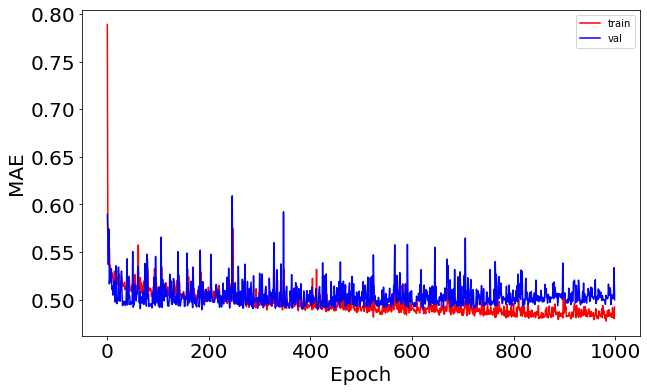

In [16]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

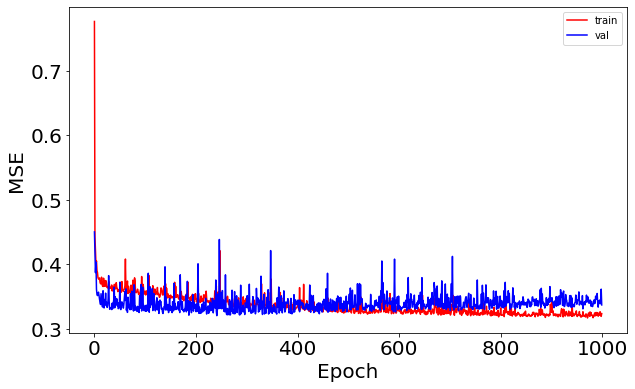

In [17]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

10/10 [==============================] - 0s 26ms/step


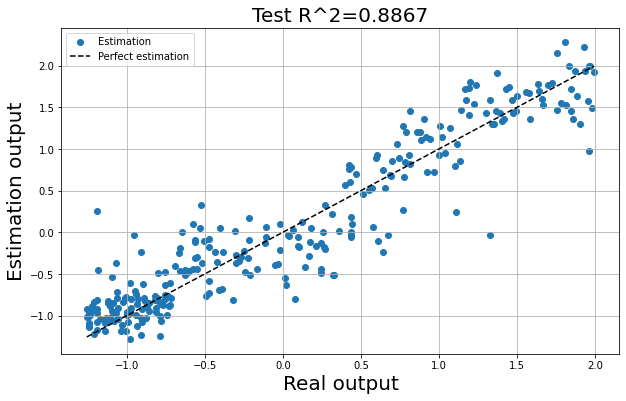

In [18]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [19]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.886684130188384
MAE:  0.2497938253184382
MSE:  0.11331586981161602


#### Resultados con train test split

In [20]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.798899,0.201101,0.334848
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908458,0.091542,0.214421
4,SVR,0.893997,0.106003,0.236861
5,NN,0.886684,0.113316,0.249794


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [21]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [22]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.18158541560608504


In [23]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [24]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Rigde

In [25]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

In [ ]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

In [ ]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

#### Árbol de decisión

In [ ]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

In [ ]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

In [ ]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

#### Máquina de vector soporte (SVR)

In [ ]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

In [ ]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

In [ ]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

#### Red Neuronal

In [ ]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


In [ ]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.4):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




In [ ]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

In [ ]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [ ]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

In [ ]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

In [ ]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



In [ ]:
ynew

#Faltaría hacer ingeniería en reversa para revertir el escalemiento


#### Anuncios parroquiales

Exámen próximo viernes 4 de Octubre en horario de clase. 
